In [237]:
import pandas as pd
import numpy as np

In [214]:
data = pd.read_csv('./offical_data.csv')

In [215]:
data.shape

(16344, 16)

In [216]:
data.info()
data = data.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16344 entries, 0 to 16343
Data columns (total 16 columns):
address              16344 non-null object
balcony_direction    9184 non-null object
bedroom              15234 non-null object
direction            8161 non-null object
furniture            9370 non-null object
investor             0 non-null float64
law_doc              5381 non-null object
loc_link             16344 non-null object
location             16344 non-null object
name                 16344 non-null object
price                16344 non-null object
project              16344 non-null object
square               15840 non-null object
time                 16344 non-null object
toilet               12101 non-null object
types                16344 non-null object
dtypes: float64(1), object(15)
memory usage: 2.0+ MB


In [217]:
data.head()


,address,balcony_direction,bedroom,direction,furniture,investor,law_doc,loc_link,location,name,price,project,square,time,toilet,types
0,"Dự án D’. Le Roi Soleil - Quảng An, Đường Xuân...",NaN,3 PN,NaN,Nội thất cơ bản.,NaN,NaN,https://www.google.com/maps/embed/v1/place?q=2...,"21.0648994445801,105.827049255371",TÔI CẦN BÁN GẤP CĂN HỘ 3PN 111M2 VÀ 146M2 QUẢ...,6.6 tỷ,D’. Le Roi Soleil - Quảng An,111 m²,09/10/2020,NaN,Tin Vip 1
1,"Green Park Trần Thủ Độ, số 1, Đường Trần Thủ Đ...",Đông-Nam,3 PN,NaN,NaN,NaN,NaN,https://www.google.com/maps/embed/v1/place?q=2...,"20.9605541229248,105.845962524414",BÁN GẤP CHUNG CƯ GREEN PARK QUẬN HOÀNG MAI 3P...,1.9 tỷ,Green Park Trần Thủ Độ,85 m²,06/10/2020,NaN,Tin Vip 1
2,"Dự án THT New City, Hoài Đức, Hà Nội",Đông-Nam,2 PN,Tây-Bắc,"Nội thất cơ bản : sàn ghạch ceramic, tường trá...",NaN,sổ hồng lâu dài,https://www.google.com/maps/embed/v1/place?q=2...,"21.06287956237793,105.72223663330078",CHỈ 300TR ĐÃ CÓ CĂN HỘ 70M2 HTLS 5% / NĂM . N...,Thỏa thuận,THT New City,70 m²,09/10/2020,2 (phòng),Tin Vip 1
3,"Dự án Sunshine City, Đường Phạm Văn Đồng, Phườ...",NaN,3 PN,NaN,Full nội thất liền tường cao cấp: - Sàn gỗ trầ...,NaN,Sổ hồng,https://www.google.com/maps/embed/v1/place?q=2...,"21.0919170379639,105.785003662109",SUNSHINE CITY CHÍNH SÁCH BÁN HÀNG THÁNG 10 CH...,4 tỷ,Sunshine City,116.7 m²,05/10/2020,2 (phòng),Tin Vip đặc biệt
4,"Imperia Sky Garden, 423, Đường Minh Khai, Phườ...",NaN,2 PN,NaN,NaN,NaN,NaN,https://www.google.com/maps/embed/v1/place?q=2...,"20.9984378814697,105.866737365723",BÁN CẮT LỖ CĂN HỘ ĐÃ BÀN GIAO 423 MINH KHAI I...,2.6 tỷ,Imperia Sky Garden,80 m²,09/10/2020,2 (phòng),Tin Vip 1


In [218]:
data = data[['time', 'address', 'direction', 'square', 'types', 'toilet', 'bedroom','balcony_direction', 'project' ,'location', 'price' ]].copy()

In [219]:
data.head()

,time,address,direction,square,types,toilet,bedroom,balcony_direction,project,location,price
0,09/10/2020,"Dự án D’. Le Roi Soleil - Quảng An, Đường Xuân...",NaN,111 m²,Tin Vip 1,NaN,3 PN,NaN,D’. Le Roi Soleil - Quảng An,"21.0648994445801,105.827049255371",6.6 tỷ
1,06/10/2020,"Green Park Trần Thủ Độ, số 1, Đường Trần Thủ Đ...",NaN,85 m²,Tin Vip 1,NaN,3 PN,Đông-Nam,Green Park Trần Thủ Độ,"20.9605541229248,105.845962524414",1.9 tỷ
2,09/10/2020,"Dự án THT New City, Hoài Đức, Hà Nội",Tây-Bắc,70 m²,Tin Vip 1,2 (phòng),2 PN,Đông-Nam,THT New City,"21.06287956237793,105.72223663330078",Thỏa thuận
3,05/10/2020,"Dự án Sunshine City, Đường Phạm Văn Đồng, Phườ...",NaN,116.7 m²,Tin Vip đặc biệt,2 (phòng),3 PN,NaN,Sunshine City,"21.0919170379639,105.785003662109",4 tỷ
4,09/10/2020,"Imperia Sky Garden, 423, Đường Minh Khai, Phườ...",NaN,80 m²,Tin Vip 1,2 (phòng),2 PN,NaN,Imperia Sky Garden,"20.9984378814697,105.866737365723",2.6 tỷ


In [220]:
data['ward'] = data['address'].apply(lambda x : x.split(', ')[-3: -2]).astype('str')
data['ward'] = data['ward'].apply(lambda x : x.replace("['", ""))
data['ward'] = data['ward'].apply(lambda x : x.replace("']", ""))

In [221]:
data['district'] = data['address'].apply(lambda x : x.split(', ')[-2: -1 ]).astype('str')
data['district'] = data['district'].apply(lambda x : x.replace("['", ""))
data['district'] = data['district'].apply(lambda x : x.replace("']", ""))

In [222]:
data['district'].value_counts()

Nam Từ Liêm            2191
Thanh Xuân             2009
Hà Đông                1926
Cầu Giấy               1744
Bắc Từ Liêm            1648
Hoàng Mai              1503
Tây Hồ                 1185
Hai Bà Trưng           1074
Long Biên              1053
Gia Lâm                 412
Thanh Trì               409
Đống Đa                 350
Ba Đình                 336
Hoài Đức                298
Đông Anh                115
Đan Phượng               24
Chương Mỹ                18
Thạch Thất                9
Hoàn Kiếm                 5
Huyện Thanh Trì           1
Hà Nội                    1
Mê Linh                   1
Q. Hà Đông                1
Dự án CT3 Nam Cường       1
huyện Thanh Trì           1
Name: district, dtype: int64

In [223]:
data.drop([301, 5900, 11586, 9751, 11014, 11733], inplace = True) 

In [224]:
data = data[~data['price'].isin(['Thỏa thuận'])]

In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14207 entries, 0 to 16343
Data columns (total 13 columns):
time                 14207 non-null object
address              14207 non-null object
direction            7402 non-null object
square               13864 non-null object
types                14207 non-null object
toilet               10782 non-null object
bedroom              13410 non-null object
balcony_direction    8250 non-null object
project              14207 non-null object
location             14207 non-null object
price                14207 non-null object
ward                 14207 non-null object
district             14207 non-null object
dtypes: object(13)
memory usage: 1.5+ MB


In [226]:
data = data.dropna(axis = 0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6126 entries, 5 to 16334
Data columns (total 13 columns):
time                 6126 non-null object
address              6126 non-null object
direction            6126 non-null object
square               6126 non-null object
types                6126 non-null object
toilet               6126 non-null object
bedroom              6126 non-null object
balcony_direction    6126 non-null object
project              6126 non-null object
location             6126 non-null object
price                6126 non-null object
ward                 6126 non-null object
district             6126 non-null object
dtypes: object(13)
memory usage: 670.0+ KB


In [227]:
data['square'] = data['square'].apply(lambda x : x.replace(' m²', ''))
data['toilet'] = data['toilet'].apply(lambda x : x[0])
data['bedroom'] = data['bedroom'].apply(lambda x : x.replace('PN', ''))
data['lat'] = data['location'].apply(lambda x : x.split(',')[0])
data['long'] = data['location'].apply(lambda x : x.split(',')[1])

In [228]:
del data['address']
del data['location']
data.head()

,time,direction,square,types,toilet,bedroom,balcony_direction,project,price,ward,district,lat,long
5,09/10/2020,Tây-Nam,36,Tin Vip 1,1,1,Đông-Bắc,Vinhomes West Point,1.55 tỷ,Dự án Vinhomes West Point,Nam Từ Liêm,21.0197982788086,105.780708312988
6,03/10/2020,Tây-Bắc,153,Tin Vip 1,2,4,Đông-Nam,Khu đô thị Nam Thăng Long - Ciputra,3.8 tỷ,Phường Phú Thượng,Tây Hồ,21.072135925293,105.810997009277
7,03/10/2020,Nam,103,Tin Vip 1,2,3,Tây-Bắc,Times City,4.1 tỷ,Phường Vĩnh Tuy,Hai Bà Trưng,20.9947910308838,105.86784362793
10,03/10/2020,Nam,85,Tin Vip 1,2,2,Nam,Mipec Rubik 360,39 triệu/m²,Phường Dịch Vọng Hậu,Cầu Giấy,21.0371532440186,105.786338806152
14,09/10/2020,Đông-Nam,65,Tin Vip 3,2,2,Tây-Bắc,Vinhomes West Point,3.05 tỷ,Phường Mỹ Đình 1,Nam Từ Liêm,21.0197982788086,105.780708312988


In [229]:
def findx(x):
    if x.find(' triệu/m²') >= 0:
        return x.replace(' triệu/m²', '')
    else:
        return '0'
def findm(x):
    if x.find(' triệu') >= 0:
        return x.replace(' triệu', '')
    else:
        return '0'
def remove_ch_1(x):
    if x.find( ' triệu/m²') >= 0:
        return '0'
    if x.find( ' tỷ') >= 0:
        return x.split()[0]
    else:
        return x
def remove_ch_2(x):
    if x.find( ' triệu') >= 0:
        return '0'
    else :
        return x;

In [230]:
data['temp'] = data['price'].apply(lambda x : findx(x))
data['price'] = data['price'].apply(lambda x : remove_ch_1(x))
data['milion'] = data['price'].apply(lambda x : findm(x))
data['price'] = data['price'].apply(lambda x : remove_ch_2(x))


In [231]:
convert_col = ['square', 'toilet', 'bedroom', 'price', 'temp', 'milion', 'lat', 'long']
for i in convert_col:
    data[i]  = data[i].astype('float32')

In [232]:
data['price'] = data['price'] * 1000 + data['square']*data['temp'] + data['milion']

In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6126 entries, 5 to 16334
Data columns (total 15 columns):
time                 6126 non-null object
direction            6126 non-null object
square               6126 non-null float32
types                6126 non-null object
toilet               6126 non-null float32
bedroom              6126 non-null float32
balcony_direction    6126 non-null object
project              6126 non-null object
price                6126 non-null float32
ward                 6126 non-null object
district             6126 non-null object
lat                  6126 non-null float32
long                 6126 non-null float32
temp                 6126 non-null float32
milion               6126 non-null float32
dtypes: float32(8), object(7)
memory usage: 574.3+ KB


In [234]:
del data['temp']
del data['milion']

In [242]:
data.head()

,time,direction,square,types,toilet,bedroom,balcony_direction,project,price,ward,district,lat,long,center_dis
5,09/10/2020,Tây-Nam,36.0,Tin Vip 1,1.0,1.0,Đông-Bắc,Vinhomes West Point,1550.0,Dự án Vinhomes West Point,Nam Từ Liêm,-8.659363,-60.615540,61.230938
6,03/10/2020,Tây-Bắc,153.0,Tin Vip 1,2.0,4.0,Đông-Nam,Khu đô thị Nam Thăng Long - Ciputra,3800.0,Phường Phú Thượng,Tây Hồ,43.678284,-30.326843,53.174335
7,03/10/2020,Nam,103.0,Tin Vip 1,2.0,3.0,Tây-Bắc,Times City,4100.0,Phường Vĩnh Tuy,Hai Bà Trưng,-33.666611,26.519775,42.857197
10,03/10/2020,Nam,85.0,Tin Vip 1,2.0,2.0,Nam,Mipec Rubik 360,3315.0,Phường Dịch Vọng Hậu,Cầu Giấy,8.695602,-54.985046,55.668385
14,09/10/2020,Đông-Nam,65.0,Tin Vip 3,2.0,2.0,Tây-Bắc,Vinhomes West Point,3050.0,Phường Mỹ Đình 1,Nam Từ Liêm,-8.659363,-60.615540,61.230938


In [241]:
data['center_dis'] = np.sqrt((data['lat'] - 21.028458) ** 2 + (data['long'] - 105.841324) ** 2) * 1000
data['lat'] = (data['lat'] - 21.028458) * 1000
data['long'] = (data['long'] - 105.841324) * 1000
data['center_dis']

5        61.230938
6        53.174335
7        42.857197
10       55.668385
14       61.230938
           ...    
16210    11.134452
16235    82.168167
16300    24.786261
16315    66.814102
16334    59.141430
Name: center_dis, Length: 6126, dtype: float32

In [114]:
train_columns = ['direction', 'square', 'toilet', 'bedroom' , 'balcony_direction', 'district', '']

In [115]:
train_columns

['direction', 'square', 'toilet', 'bedroom', 'balcony_direction', 'district']

In [116]:
df1 = data[train_columns].copy()
y = data['price'].copy()
y.isnull().sum()

0

In [117]:
df1.head()

,direction,square,toilet,bedroom,balcony_direction,district
0,Tây,97.0,2.0,3.0,Đông,Hoài Đức
1,Đông-Nam,58.0,1.0,2.0,Tây-Bắc,Nam Từ Liêm
2,Bắc,61.0,2.0,2.0,Đông-Nam,Hà Đông
3,Đông-Bắc,102.0,2.0,3.0,Đông-Nam,Bắc Từ Liêm
4,Tây,68.0,2.0,2.0,Đông,Hoàng Mai


In [118]:
y.head()

0    1800.0
1    1380.0
2    1400.0
3    2850.0
4    2600.0
Name: price, dtype: float32

In [120]:
object_cols = ['direction', 'balcony_direction', 'district']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in object_cols:
    df1[col] = le.fit_transform(df1[col])

In [121]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 6 columns):
direction            1915 non-null int64
square               1915 non-null float32
toilet               1915 non-null float32
bedroom              1915 non-null float32
balcony_direction    1915 non-null int64
district             1915 non-null int32
dtypes: float32(3), int32(1), int64(2)
memory usage: 60.0 KB


In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (df1, y, test_size=0.25, random_state=42)

In [123]:
y_train.isnull().sum()

0

In [124]:
X_train.head()

,direction,square,toilet,bedroom,balcony_direction,district
1387,7,160.000000,3.0,4.0,3,3
1874,6,70.000000,2.0,2.0,4,7
543,0,73.370003,2.0,2.0,1,1
478,3,75.000000,2.0,2.0,7,8
741,6,63.000000,2.0,2.0,4,8


In [54]:
y_train.head()

1387    4160.0
1874    1890.0
543     2700.0
478     1500.0
741      970.0
Name: price, dtype: float32

In [98]:
from sklearn.neighbors import KNeighborsRegressor
md = KNeighborsRegressor(n_neighbors=50)
md.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                    weights='uniform')

In [99]:
from sklearn.metrics import r2_score
r2_score(y_test, md.predict(X_test))

-87.09414673652769

In [100]:
y_pred = md.predict(X_test)

In [101]:
y_test

1232    4160.00000
111     1950.00000
316     1670.00000
781     1229.63501
416     2900.00000
           ...    
1333    2300.00000
199     5500.00000
1692    6100.00000
1628    3100.00000
1262    1900.00000
Name: price, Length: 479, dtype: float32

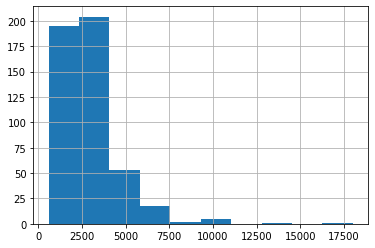

In [102]:
y_test.hist()

In [103]:
y_d = pd.DataFrame(data = y_pred)
y_t = pd.DataFrame(data = y_test)

In [104]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

-87.09414673652769

In [105]:
y_t

,price
1232,4160.00000
111,1950.00000
316,1670.00000
781,1229.63501
416,2900.00000
...,...
1333,2300.00000
199,5500.00000
1692,6100.00000
1628,3100.00000


In [106]:
y_t.reset_index(inplace = True)

In [107]:
del y_t['index']

In [108]:
y_t['pred'] = y_d

In [109]:
y_t

,price,pred
0,4160.00000,5383.058105
1,1950.00000,1775.280029
2,1670.00000,2548.778076
3,1229.63501,1694.227539
4,2900.00000,2827.780029
...,...,...
474,2300.00000,2214.525146
475,5500.00000,2537.100098
476,6100.00000,4243.209961
477,3100.00000,2326.880859


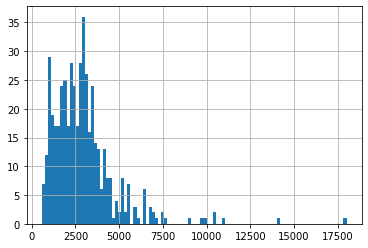

In [110]:
y_t['price'].hist(bins = 100)

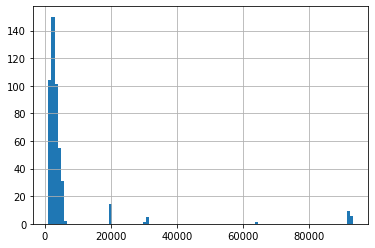

In [113]:
y_t['pred'].hist(bins = 100)

In [125]:
from sklearn.ensemble import RandomForestRegressor
md = RandomForestRegressor(max_depth=10, random_state=0).fit(X_train, y_train)


C:\Users\huy doan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [126]:
md

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [127]:
y_prd_rf = md.predict(X_test)

In [128]:
y_prd_rf

array([4.28601205e+03, 1.92453291e+03, 2.31358602e+03, 1.61915143e+03,
       3.34848047e+03, 2.54364000e+05, 3.20846791e+03, 1.44537549e+03,
       1.17036991e+03, 1.13115550e+03, 1.87642000e+03, 2.48629901e+03,
       2.45334194e+03, 2.53176873e+03, 3.18287535e+03, 3.00993784e+03,
       2.98989596e+03, 1.84005454e+03, 4.36202982e+03, 2.56956921e+03,
       1.69683276e+03, 2.92761325e+03, 1.16470073e+03, 2.33810874e+03,
       1.05740173e+03, 1.71737092e+03, 1.34588492e+03, 1.55813017e+03,
       1.86662708e+03, 4.66519467e+03, 4.04301844e+03, 5.33661984e+03,
       2.91378093e+03, 2.69975882e+03, 2.91346142e+05, 3.82643282e+03,
       1.26475236e+03, 1.87642000e+03, 2.93646701e+03, 1.92149824e+03,
       2.70028894e+03, 3.17916475e+03, 1.10116170e+03, 1.11288138e+03,
       3.05834529e+03, 2.86585976e+03, 3.14185655e+03, 2.28018277e+03,
       2.32674883e+03, 1.24976448e+03, 3.20109105e+03, 2.76478941e+03,
       2.81993067e+03, 1.13547500e+03, 3.08890706e+03, 3.70056663e+03,
      

In [129]:
y_prd_rf = pd.DataFrame(y_prd_rf)

In [138]:
y_t['rd'] = y_prd_rf

In [141]:
y_t['rd'] = y_t['rd'].astype('float32')

In [142]:
y_t

,price,pred,rd
0,4160.00000,5383.058105,4286.012207
1,1950.00000,1775.280029,1924.532959
2,1670.00000,2548.778076,2313.585938
3,1229.63501,1694.227539,1619.151489
4,2900.00000,2827.780029,3348.480469
...,...,...,...
474,2300.00000,2214.525146,2615.908936
475,5500.00000,2537.100098,5411.626953
476,6100.00000,4243.209961,4517.830078
477,3100.00000,2326.880859,3048.307861


In [150]:
df.describe(include = 'all')

,address,balcony_direction,bedroom,direction,furniture,investor,law_doc,name,price,project,square,time,toilet,types
count,14598,8262,13449,7362,8539,12439,4858,14598,14598,14598,14132,14598,11020,14598
unique,2582,8,11,8,4847,239,697,14129,1007,558,1292,102,9,1
top,"Dự án Vinhomes Ocean Park Gia Lâm, Xã Dương Xá...",Đông-Nam,2 PN,Tây-Bắc,Full nội thất.,Tập đoàn Vingroup,Sổ đỏ.,"Chính chủ bán gấp! Căn góc 110m2, 3PN, 2WC tạ...",Thỏa thuận,Goldmark City,70 m²,28/09/2020,2 (phòng),Bán căn hộ chung cư
freq,244,2930,6701,1754,335,1704,408,10,1947,368,363,2360,9181,14598
